# 發布本部分析後畢業生畢業後第三年之就業概況  
**資料來源:https://data.gov.tw/dataset/29862**

## 讀取套件、資料

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 讓圖表可顯示中文
plt.rc('font', family='Microsoft JhengHei')

#引入資料、指定index
df1 = pd.read_csv('學校已投入職場比率.csv',encoding='utf-8')
df2 = pd.read_csv('學類.csv',encoding='utf-8')
df2 = df2.set_index('學門學類')
df3 = pd.read_csv('學門.csv',encoding='utf-8')
df3 = df3.set_index('學門名稱')

## 簡化標頭名稱與補上遺漏值

In [372]:
# 99學年度畢業生102薪資年博士未滿35歲=>99/102/博士未滿35歲
new1_columns = df1.columns.str.replace('學年度畢業生', '/').str.replace('薪資年', '/')
# 99學年度畢業生102年已投入職場比率_碩士_日間學制_已投入職場比率%=>99/102/比率_碩士_日間學制_比率%
new2_columns = df2.columns.str.replace('學年度畢業生', '/').str.replace('薪資年', '/').str.replace('已投入職場比率_',"/").str.replace('已投入職場比率%',"比率%")
# 99學年度畢業生102薪資年博士未滿35歲平均薪資=>99/102/博士未滿35歲平均薪資
new3_columns = df3.columns.str.replace('學年度畢業生', '/').str.replace('薪資年', '/').str.replace('已投入職場比率%',"比率%")
df1.columns = new1_columns
df2.columns = new2_columns
df3.columns = new3_columns
df1.head()
# 將NaN取代成0
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)
# 將%刪除
df1 = df1.replace('%', '', regex=True)
df2 = df2.replace('%', '', regex=True)
df3 = df3.replace('%', '', regex=True)
#刪除代碼
df1 = df1.drop('學校代碼', axis=1)
df2 = df2.drop('代碼', axis=1)
df3 = df3.drop('學門代碼', axis=1)
# 將除了第一列以外的所有列pd.to_numeric()函数
df1.iloc[:, 1:] = df1.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df1.head()

,學校名稱,99/102/博士未滿35歲,99/102/博士35歲以上,99/102/碩士日間學制,99/102/碩士在職專班,99/102/學士日間學制,99/102/學士進修學制,99/102/專科日間學制,99/102/專科進修學制,99/103/博士未滿35歲,...,99/103/專科日間學制,99/103/專科進修學制,100/103/博士未滿35歲,100/103/博士35歲以上,100/103/碩士日間學制,100/103/碩士在職專班,100/103/學士日間學制,100/103/學士進修學制,100/103/專科日間學制,100/103/專科進修學制
0,國立政治大學,92.0,96.36,93.87,94.74,80.81,0.0,0.0,0.0,96.0,...,0.0,0.0,92.59,90.0,92.51,97.29,82.99,0.0,0.0,0.0
1,國立清華大學,96.13,96.2,95.31,94.05,78.46,0.0,0.0,0.0,95.88,...,0.0,0.0,96.41,95.83,94.64,93.07,76.26,0.0,0.0,0.0
2,國立臺灣大學,93.92,95.2,91.95,94.62,77.65,87.85,0.0,0.0,97.01,...,0.0,0.0,95.66,95.45,92.97,94.05,75.92,76.19,0.0,0.0
3,國立臺灣師範大學,93.75,93.58,92.93,95.89,80.38,0.0,0.0,0.0,94.0,...,0.0,0.0,92.59,99.1,93.55,96.27,81.44,0.0,0.0,0.0
4,國立成功大學,97.09,95.77,94.34,95.63,81.24,0.0,0.0,0.0,97.8,...,0.0,0.0,97.63,95.12,95.19,97.39,79.55,0.0,0.0,0.0


## Part1 學校已投入職場比率

### 新增「學校類型」

In [373]:
type_list = []
for i in df1['學校名稱']:
    if ('護' in i):
        type_list.append('護專')
    elif ('技術' in i):
        type_list.append('技術學院')
    elif ('國立' in i) or ('市立' in i):
        if ('技術' not in i) and ('護' not in i):
            if ('師範' in i) or ('教育' in i):
                type_list.append('師範大學')
            elif ('科技' in i):
                type_list.append('國立科技大學')
            else:
                type_list.append('國立一般大學')
    else:
        if ('科技' in i):
                type_list.append('私立科技大學')
        else:
                type_list.append('私立大學')

df1['類型'] = type_list # 將 Dataframe 新增「類型」column


In [374]:
df1.head()

,學校名稱,99/102/博士未滿35歲,99/102/博士35歲以上,99/102/碩士日間學制,99/102/碩士在職專班,99/102/學士日間學制,99/102/學士進修學制,99/102/專科日間學制,99/102/專科進修學制,99/103/博士未滿35歲,...,99/103/專科進修學制,100/103/博士未滿35歲,100/103/博士35歲以上,100/103/碩士日間學制,100/103/碩士在職專班,100/103/學士日間學制,100/103/學士進修學制,100/103/專科日間學制,100/103/專科進修學制,類型
0,國立政治大學,92.0,96.36,93.87,94.74,80.81,0.0,0.0,0.0,96.0,...,0.0,92.59,90.0,92.51,97.29,82.99,0.0,0.0,0.0,國立一般大學
1,國立清華大學,96.13,96.2,95.31,94.05,78.46,0.0,0.0,0.0,95.88,...,0.0,96.41,95.83,94.64,93.07,76.26,0.0,0.0,0.0,國立一般大學
2,國立臺灣大學,93.92,95.2,91.95,94.62,77.65,87.85,0.0,0.0,97.01,...,0.0,95.66,95.45,92.97,94.05,75.92,76.19,0.0,0.0,國立一般大學
3,國立臺灣師範大學,93.75,93.58,92.93,95.89,80.38,0.0,0.0,0.0,94.0,...,0.0,92.59,99.1,93.55,96.27,81.44,0.0,0.0,0.0,師範大學
4,國立成功大學,97.09,95.77,94.34,95.63,81.24,0.0,0.0,0.0,97.8,...,0.0,97.63,95.12,95.19,97.39,79.55,0.0,0.0,0.0,國立一般大學


### Q1 一般大學畢業三年後就業比例分布

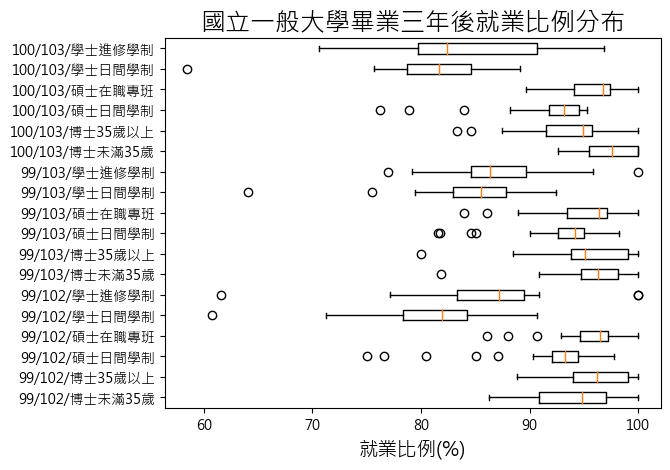

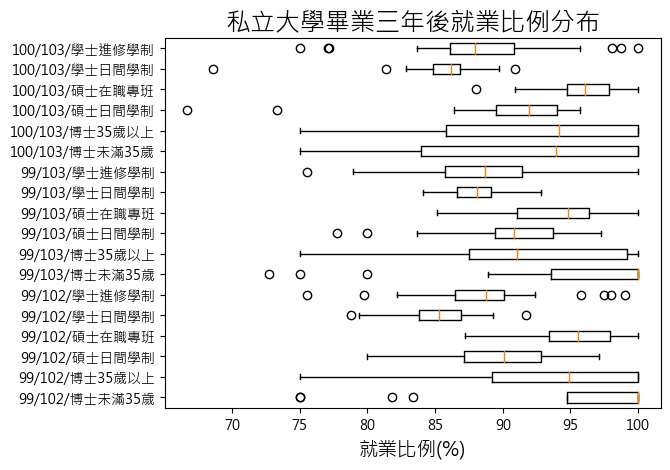

In [375]:
# 定義盒狀圖
def box(category,n):
    df1_1 = df1[df1.類型 == category]
    # 創建空字典
    processed_data = {}
    # 將指定列的非0資料存入字典中
    for column in df1_1.columns[1:-1]:
        column_data = df1_1[column]
        filtered_data = [value for value in column_data if value != 0]
        processed_data[column] = filtered_data
    # 統計column內含有多少數量
    column_counts = {column: len(values) for column, values in processed_data.items()}
    # 刪除數量小於n間學校的資料
    for column, count in column_counts.items():
        if count < n:
            del processed_data[column]
    # 繪製盒狀圖
    plt.boxplot(processed_data.values(), labels=processed_data.keys(), vert=False)
    plt.xlabel('就業比例(%)',fontsize = 14)
    plt.title(f'{category}畢業三年後就業比例分布',fontsize = 18)
    plt.show()

box("國立一般大學",10)
box('私立大學',10)

### Q2 科技大學畢業三年後就業比例

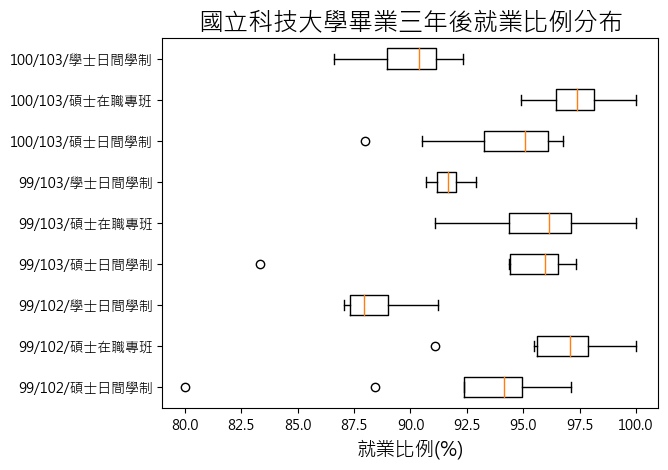

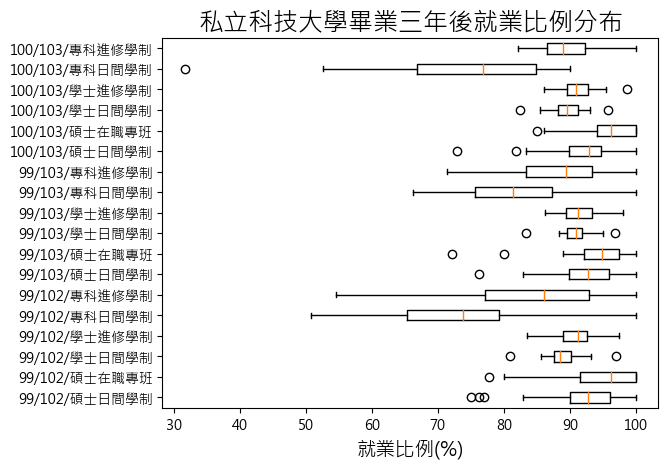

In [376]:
box('國立科技大學',10)
box('私立科技大學',15)

### Q3 師範與教育體系大學畢業三年後就業比例

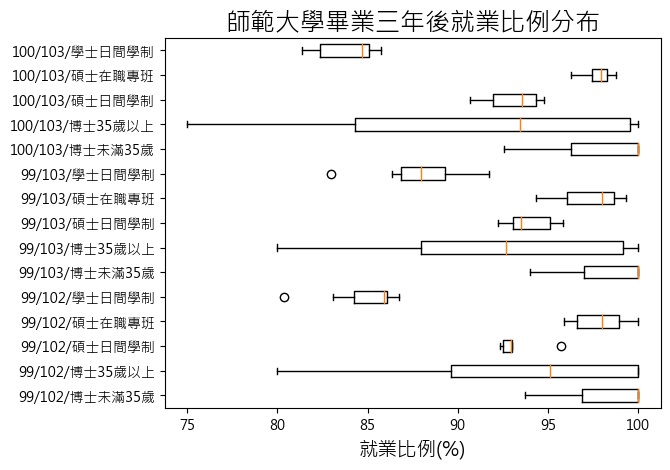

In [377]:
# 師範大學有三間選定n=3
box('師範大學',3)

### Q4 技術學院畢業三年後就業比例

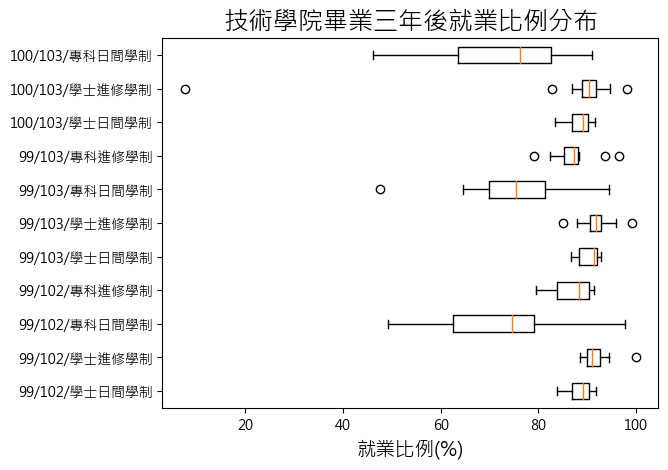

In [378]:
box('技術學院',10)

### Q5 護專畢業三年後就業比例

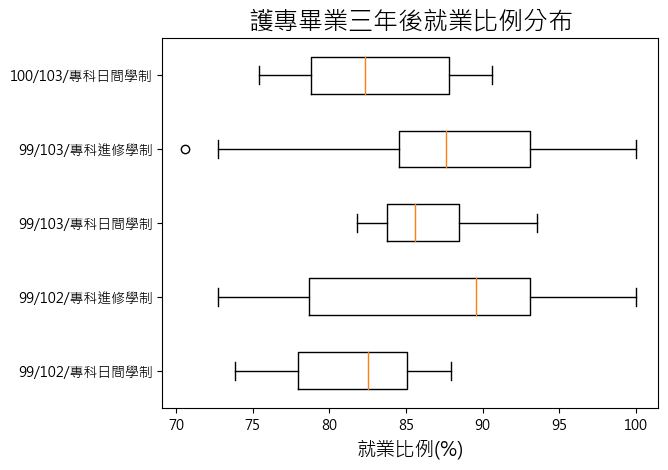

In [379]:
box('護專',10)

## Part2 學類

### Q6 各學位等級(日間)平均月薪前10高(99畢業102年薪資)?

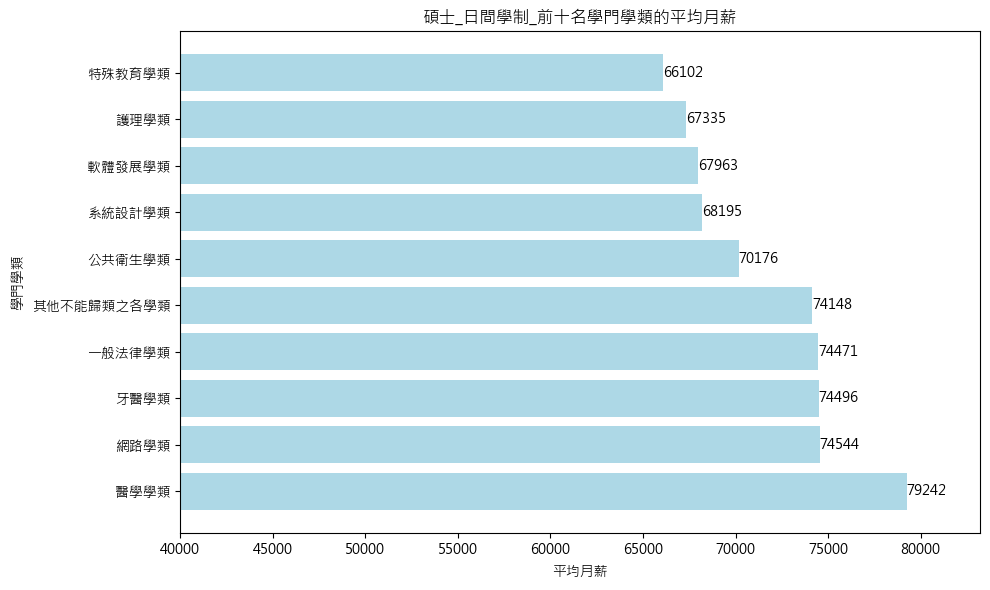

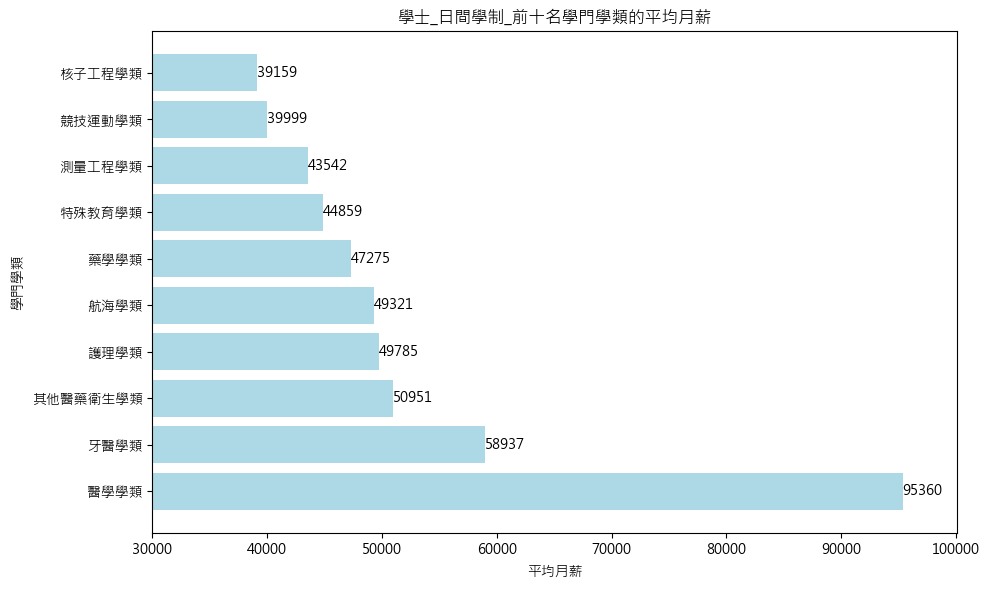

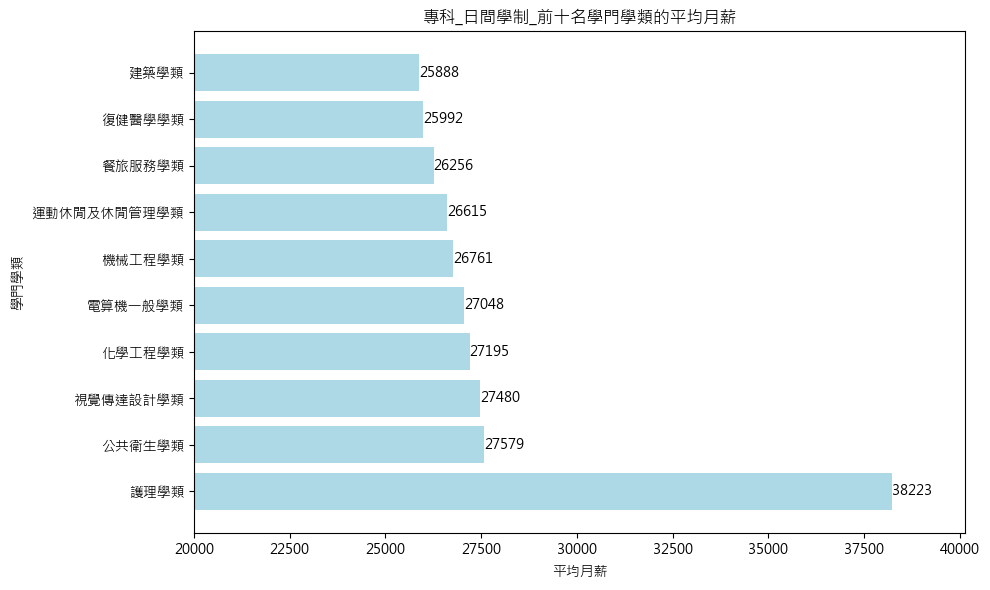

In [380]:
# 99/102年/碩士_日間學制_平均月薪前10高
# G=99；M=102；degree='碩士'；K='日間學制'；N=10
def barh_top(G,M,degree,K,N,L):
    # 降序排列前十名
    top = df2.nlargest(N, f'{G}/{M}年/{degree}_{K}_平均月薪')

    # 繪製長條圖
    plt.figure(figsize=(10, 6))
    plt.barh(top.index, top[f'{G}/{M}年/{degree}_{K}_平均月薪'], color='lightblue')
    plt.xlabel('平均月薪')
    plt.xlim(L)
    plt.ylabel('學門學類')
    plt.title(f'{degree}_{K}_前十名學門學類的平均月薪')

    # 新增數值標籤
    for i, v in enumerate(top[f'{G}/{M}年/{degree}_{K}_平均月薪']):
        plt.text(v, i, str(int(v)), va='center', fontsize=10, color='black')
    plt.tight_layout()
    plt.show()
barh_top(99,102,'碩士','日間學制',10,40000)
barh_top(99,102,'學士','日間學制',10,30000)
barh_top(99,102,'專科','日間學制',10,20000)

### Q7 各學位等級(在職專班、進修學制)平均月薪前10高(99畢業102年薪資)?

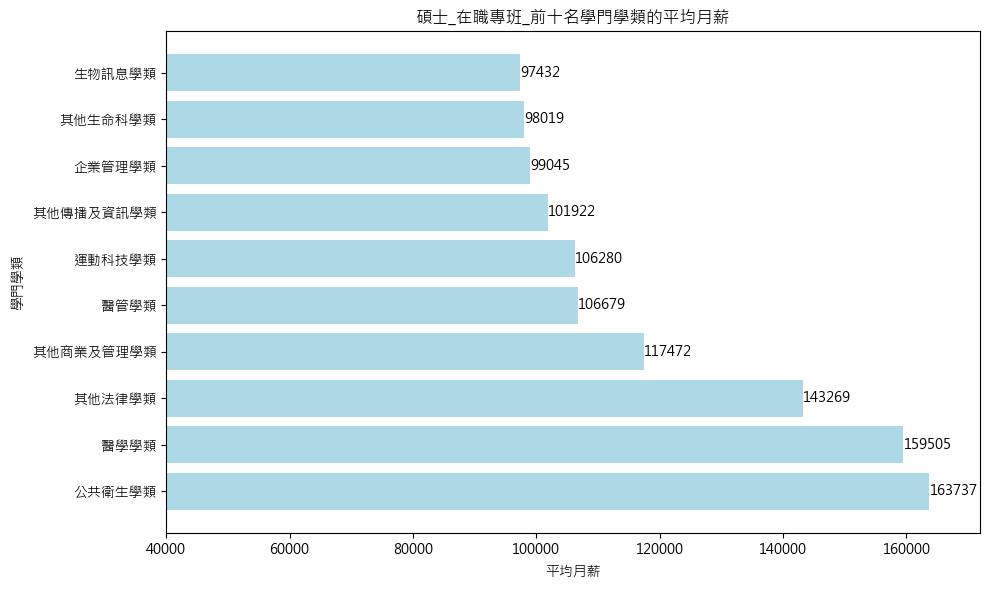

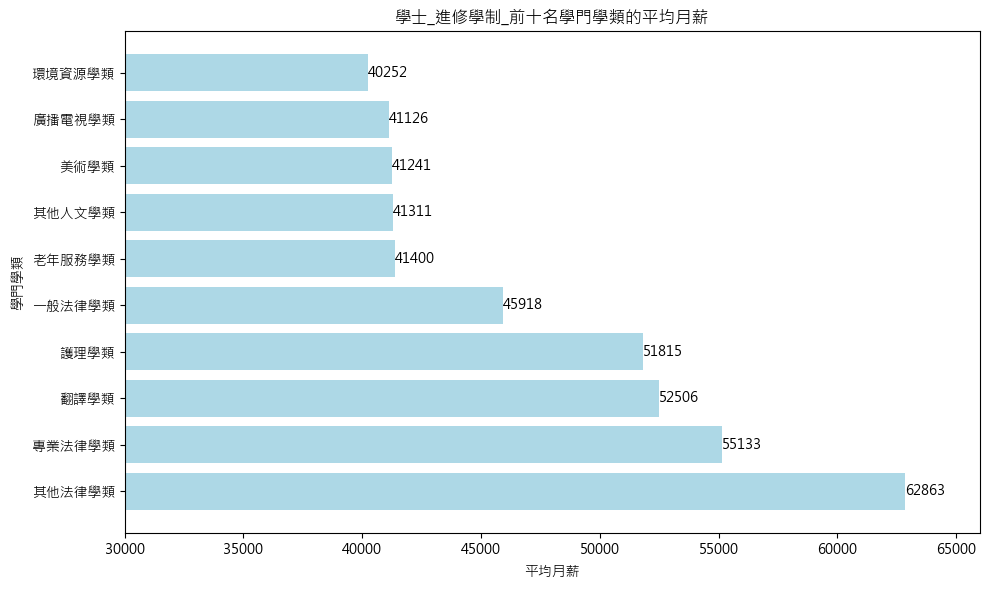

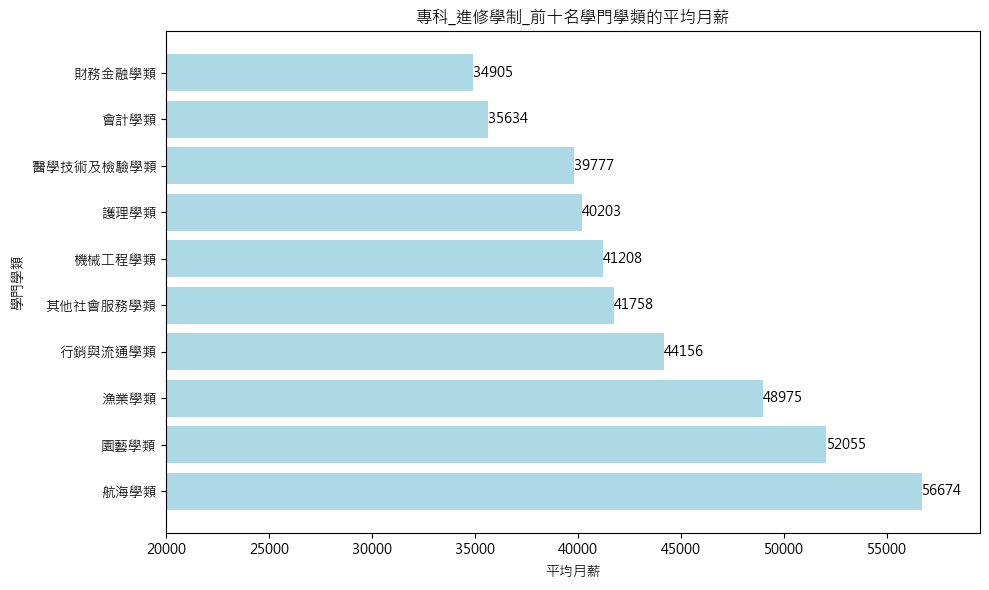

In [381]:
barh_top(99,102,'碩士','在職專班',10,40000)
barh_top(99,102,'學士','進修學制',10,30000)
barh_top(99,102,'專科','進修學制',10,20000)

### Q8 同一學類下碩士與學士平均月薪比(日間)

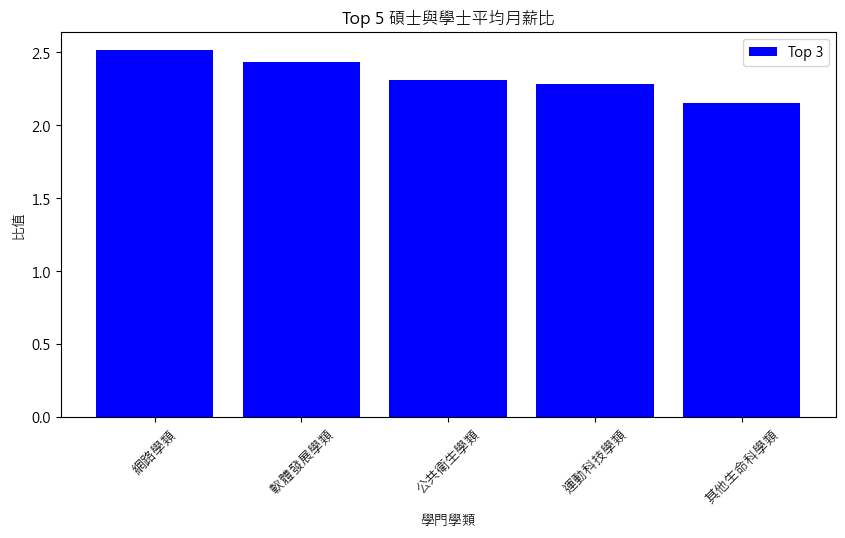

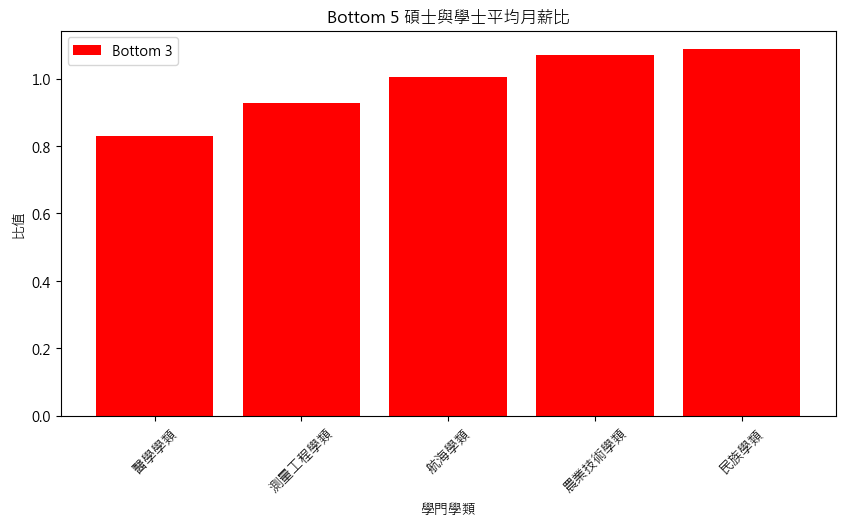

In [382]:
# 確認分子分母皆不是0
df2 = df2[(df2["99/102年/碩士_日間學制_平均月薪"] != 0) & (df2["99/102年/學士_日間學制_平均月薪"] != 0)]
# 計算碩士與學士平均月薪比
df2['碩學比'] = df2["99/102年/碩士_日間學制_平均月薪"] / df2["99/102年/學士_日間學制_平均月薪"]

# 找出前5和倒數前五名
top = df2.nlargest(5, '碩學比')
bottom = df2.nsmallest(5, '碩學比')

# 繪製長條圖(TOP)
plt.figure(figsize=(10, 5))
plt.bar(top.index, top['碩學比'], color='blue', label='Top 3')
plt.xticks(top.index, top.index, rotation=45)
plt.xlabel('學門學類')
plt.ylabel('比值')
plt.title('Top 5 碩士與學士平均月薪比')
plt.legend()

plt.show()

# 繪製長條圖(BOTTOM)
plt.figure(figsize=(10, 5))
plt.bar(bottom.index, bottom['碩學比'], color='red', label='Bottom 3')
plt.xticks(bottom.index, bottom.index, rotation=45)
plt.xlabel('學門學類')
plt.ylabel('比值')
plt.title('Bottom 5 碩士與學士平均月薪比')
plt.legend()

plt.show()

### Q9 同一學類下學士日間與進修平均月薪比

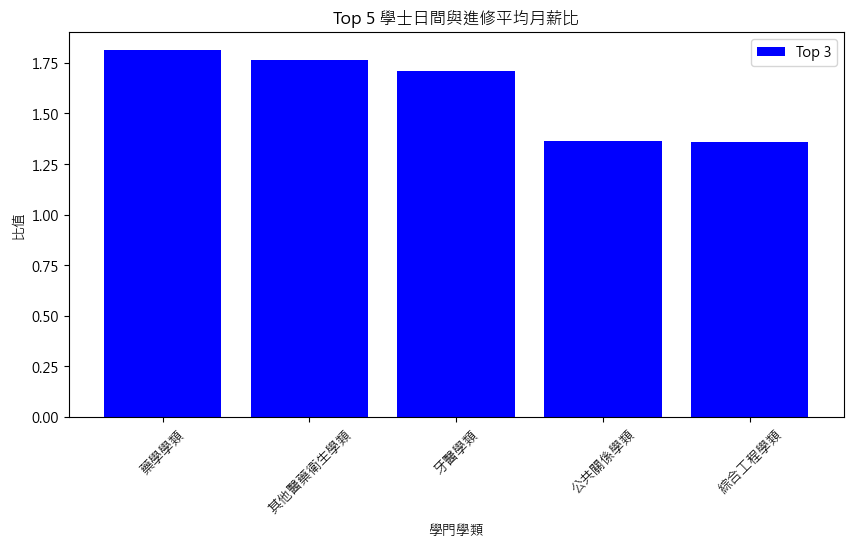

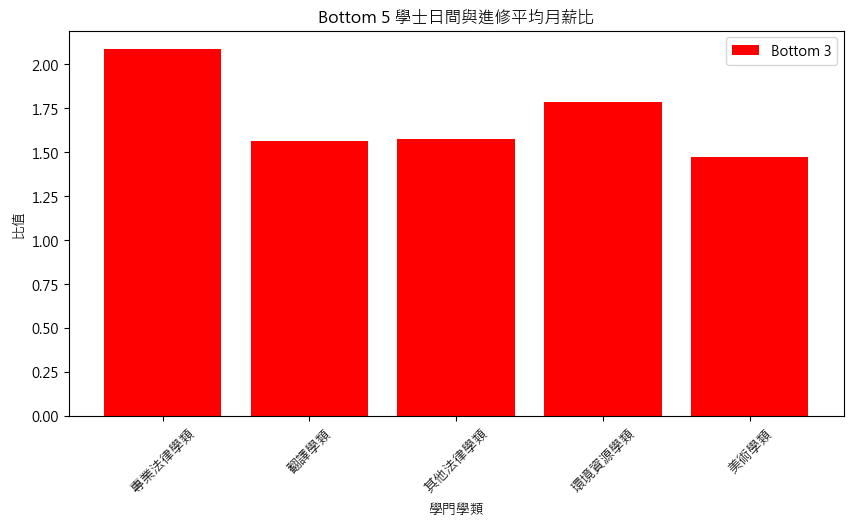

In [383]:
# 確認分子分母皆不是0
df2 = df2[(df2.iloc[:,4] != 0) & (df2.iloc[:,6] != 0)]
# 計算碩士與學士平均月薪比
df2['學士日夜比'] = df2["99/102年/學士_日間學制_平均月薪"] / df2["99/102年/學士_進修學制_平均月薪"]

# 找出前5和倒數前五名
top = df2.nlargest(5, '學士日夜比')
bottom = df2.nsmallest(5, '學士日夜比')

# 繪製長條圖(TOP)
plt.figure(figsize=(10, 5))
plt.bar(top.index, top['學士日夜比'], color='blue', label='Top 3')
plt.xticks(top.index, top.index, rotation=45)
plt.xlabel('學門學類')
plt.ylabel('比值')
plt.title('Top 5 學士日間與進修平均月薪比')
plt.legend()

plt.show()

# 繪製長條圖(BOTTOM)
plt.figure(figsize=(10, 5))
plt.bar(bottom.index, bottom['碩學比'], color='red', label='Bottom 3')
plt.xticks(bottom.index, bottom.index, rotation=45)
plt.xlabel('學門學類')
plt.ylabel('比值')
plt.title('Bottom 5 學士日間與進修平均月薪比')
plt.legend()

plt.show()

### Q10 同一學類下碩士在職與日間平均月薪比

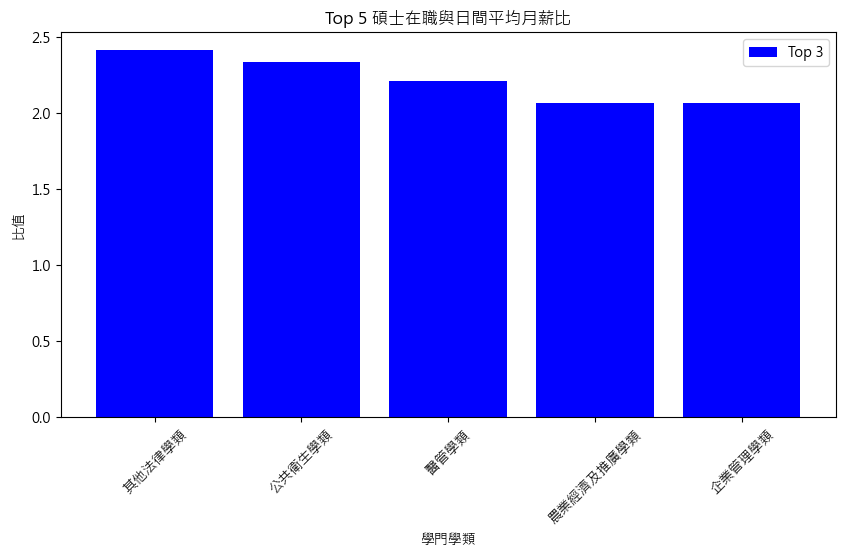

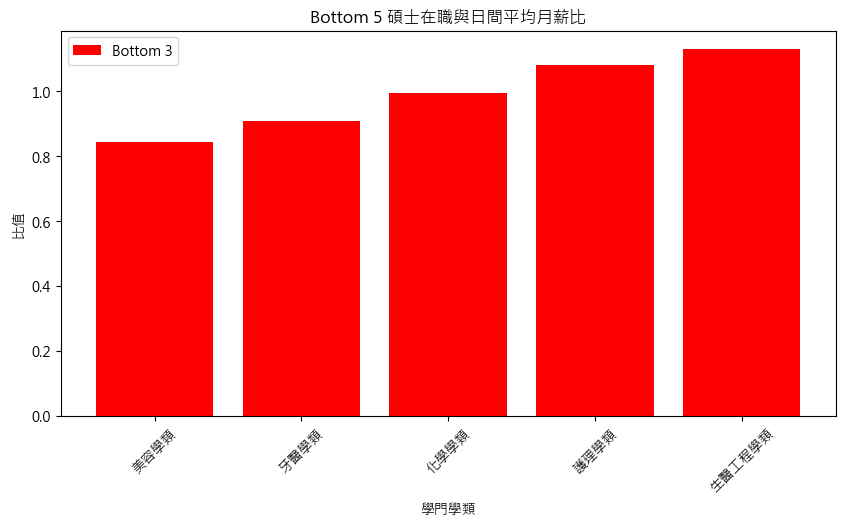

In [384]:
# 確認分子分母皆不是0
df2 = df2[(df2["99/102年/碩士_在職專班_平均月薪"] != 0) & (df2["99/102年/碩士_日間學制_平均月薪"] != 0)]
# 計算碩士與學士平均月薪比
df2['碩士在職與日間比'] = df2["99/102年/碩士_在職專班_平均月薪"] / df2["99/102年/碩士_日間學制_平均月薪"]

# 找出前5和倒數前五名
top = df2.nlargest(5, '碩士在職與日間比')
bottom = df2.nsmallest(5, '碩士在職與日間比')

# 繪製長條圖(TOP)
plt.figure(figsize=(10, 5))
plt.bar(top.index, top['碩士在職與日間比'], color='blue', label='Top 3')
plt.xticks(top.index, top.index, rotation=45)
plt.xlabel('學門學類')
plt.ylabel('比值')
plt.title('Top 5 碩士在職與日間平均月薪比')
plt.legend()

plt.show()

# 繪製長條圖(BOTTOM)
plt.figure(figsize=(10, 5))
plt.bar(bottom.index, bottom['碩士在職與日間比'], color='red', label='Bottom 3')
plt.xticks(bottom.index, bottom.index, rotation=45)
plt.xlabel('學門學類')
plt.ylabel('比值')
plt.title('Bottom 5 碩士在職與日間平均月薪比')
plt.legend()

plt.show()

## Part3 學門

### Q11 同年博士畢業生是否35歲的薪資比

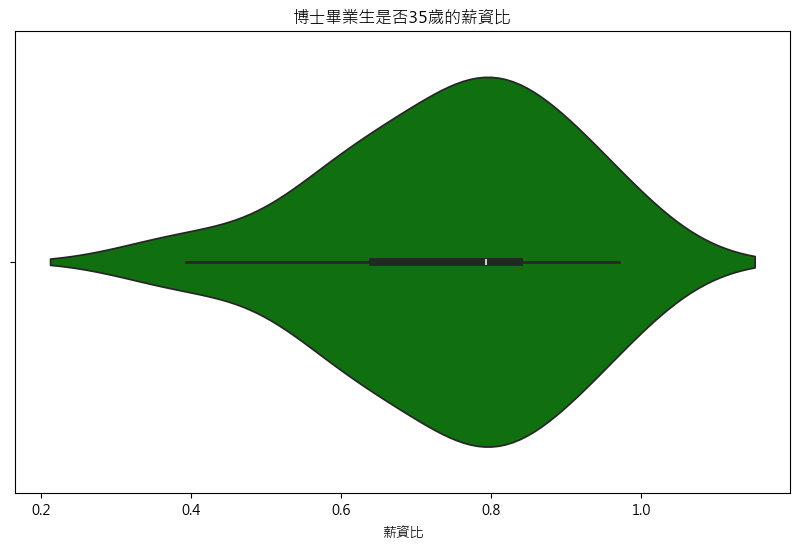

In [390]:
# 確認分子分母皆不是0
df3 = df3[(df3["99/102/博士未滿35歲平均薪資"] != 0) & (df3["99/102/博士35歲以上平均薪資"] != 0)]
# 同年博士畢業生是否35歲的薪資比
df3['薪資比'] = df3["99/102/博士未滿35歲平均薪資"] / df3["99/102/博士35歲以上平均薪資"]
plt.figure(figsize=(10, 6))
sns.violinplot(x=df3['薪資比'],color='g')
plt.title('博士畢業生是否35歲的薪資比')
plt.xlabel('薪資比')
plt.show()

### Q12 同年博士畢業生是否35歲的薪資成長率比較

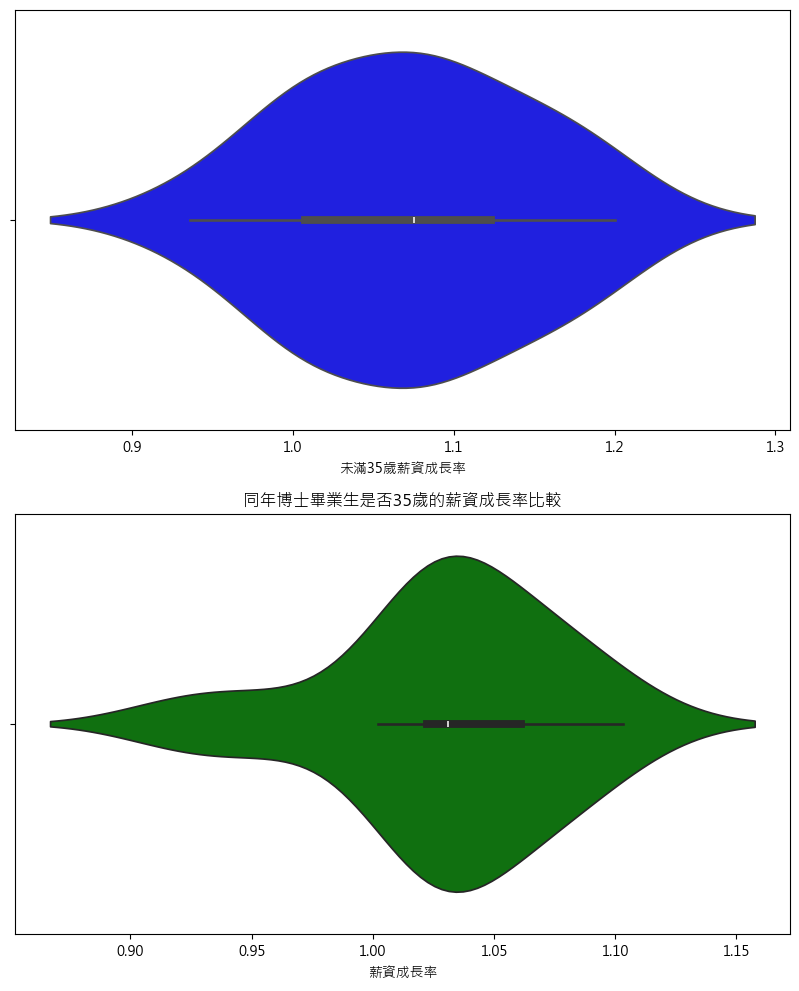

In [414]:
# 確認分子分母皆不是0
df3 = df3[(df3["99/103/博士35歲以上平均薪資"] != 0) & (df3["99/102/博士35歲以上平均薪資"] != 0)]
# 同年博士畢業生35歲以上的薪資成長率
df3['35歲以上薪資成長率'] = df3["99/103/博士35歲以上平均薪資"] / df3["99/102/博士35歲以上平均薪資"]
# 確認分子分母皆不是0
df3 = df3[(df3["99/103/博士未滿35歲平均薪資"] != 0) & (df3["99/102/博士未滿35歲平均薪資"] != 0)]
# 同年博士畢業生未滿35歲的薪資成長率
df3['未滿35歲薪資成長率'] = df3["99/103/博士未滿35歲平均薪資"] / df3["99/102/博士未滿35歲平均薪資"]
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
sns.violinplot(x=df3['未滿35歲薪資成長率'],color='b', ax=axes[0])
sns.violinplot(x=df3['35歲以上薪資成長率'],color='g', ax=axes[1])
plt.title('同年博士畢業生是否35歲的薪資成長率比較')
plt.xlabel('薪資成長率')
plt.show()

### Q12 不同屆博士畢業生的第三年薪資比較

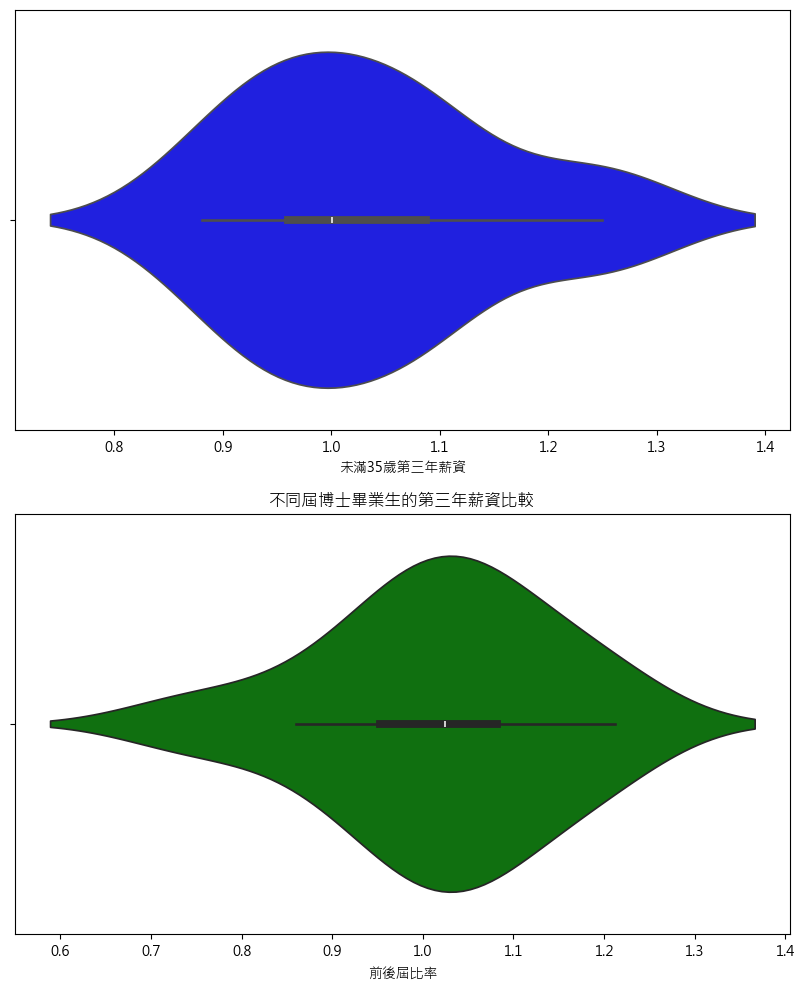

In [416]:
# 確認分子分母皆不是0
df3 = df3[(df3["100/103/博士未滿35歲平均薪資"] != 0) & (df3["99/102/博士未滿35歲平均薪資"] != 0)]
# 同年博士畢業生35歲以上的薪資成長率
df3['未滿35歲第三年薪資'] = df3["100/103/博士未滿35歲平均薪資"] / df3["99/102/博士未滿35歲平均薪資"]
# 確認分子分母皆不是0
df3 = df3[(df3["100/103/博士35歲以上平均薪資"] != 0) & (df3["99/102/博士35歲以上平均薪資"] != 0)]
# 同年博士畢業生未滿35歲的薪資成長率
df3['35歲以上第三年薪資'] = df3["100/103/博士35歲以上平均薪資"] / df3["99/102/博士35歲以上平均薪資"]
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
sns.violinplot(x=df3['未滿35歲第三年薪資'],color='b', ax=axes[0])
sns.violinplot(x=df3['35歲以上第三年薪資'],color='g', ax=axes[1])
plt.title('不同屆博士畢業生的第三年薪資比較')
plt.xlabel('前後屆比率')
plt.show()

In [415]:
df3.head()

,99/102/博士未滿35歲平均薪資,99/102/博士35歲以上平均薪資,99/103/博士未滿35歲平均薪資,99/103/博士35歲以上平均薪資,100/103/博士未滿35歲平均薪資,100/103/博士35歲以上平均薪資,99/102/博士未滿35歲比率%,99/102/博士35歲以上比率%,99/103/博士未滿35歲比率%,99/103/博士35歲以上比率%,100/103/博士未滿35歲比率%,100/103/博士35歲以上比率%,薪資比,薪資成長率,35歲以上薪資成長率,未滿35歲薪資成長率
學門名稱,,,,,,,,,,,,,,,,
教育學門,74639.0,94095,78191.0,96410,67604.0,94261,97.14,94.81,97.14,93.87,100.00,93.53,0.793230,1.047589,1.024603,1.047589
藝術學門,77731.0,80128,78044.0,82705,0.0,76176,100.00,88.89,100.00,88.89,0,89.47,0.970085,1.004027,1.032161,1.004027
人文學門,69552.0,86547,70010.0,88667,69199.0,80879,89.58,94.41,89.58,93.30,90.48,88.69,0.803633,1.006585,1.024495,1.006585
社會及行為科學學門,78690.0,83211,78541.0,84920,69357.0,88616,93.94,91.43,100.00,89.52,94.44,90.60,0.945668,0.998106,1.020538,0.998106
商業及管理學門,78496.0,105010,85310.0,110197,72800.0,104547,96.39,95.11,96.43,94.22,94.57,93.27,0.747510,1.086807,1.049395,1.086807
